### Masterlens

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.constants as sp
import astropy.cosmology as cosmo

In [3]:
lens_df = pd.read_csv('masterlens.csv')
lens_df.head()

,system_name,discovery_date,ra_hrs,ra_mins,ra_secs,ra_coord,dec_degrees,dec_arcmin,dec_arcsec,dec_coord,lensgrade,number_images,theta_e,theta_e_err,z_lens,z_lens_err,z_source,z_source_err,vdisp,vdisp_err
0,SDSSJ0008-0004,2008-08-01,0,8,2.96,2.012310,0,4,8.26,-0.068960,A,3,1.16,0.02,0.440,0.0001,1.192,0.001,232.0,39.0
1,ACSJ001423.02-302109.8,2012-06-15,0,14,23.02,3.595917,-30,21,9.80,-30.352722,B,1,1.52,0.01,NaN,NaN,NaN,NaN,NaN,NaN
2,ACSJ001426.26-302255.9,2012-06-15,0,14,26.26,3.609417,-30,22,55.90,-30.382194,A,1,1.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3,CSWA34,2009-01-01,0,17,1.54,4.256430,-10,9,11.12,-10.153088,NaN,2,NaN,NaN,0.500,0.1000,NaN,NaN,NaN,NaN
4,MACSJ0018.5+1626,2010-06-01,0,18,33.60,4.640007,16,26,16.29,16.437859,A,0,24.00,2.00,0.545,NaN,NaN,NaN,NaN,NaN


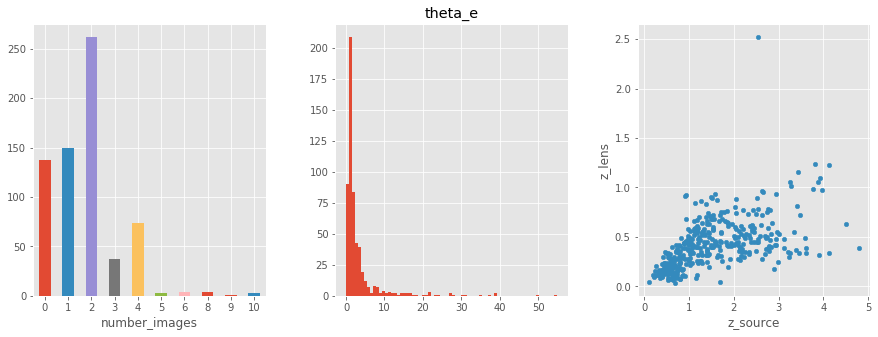

<Figure size 432x288 with 0 Axes>

In [7]:
# barplot do numero de imagens em cada lente

fig, axes = plt.subplots(1,3, figsize=(15,5))
grouped = lens_df.groupby('number_images')['system_name'].count()
grouped.plot.bar(ax=axes[0],rot=0)

lens_df.hist(ax=axes[1], column='theta_e', bins = 70)

# plot redshift fonte x redshift lente
lens_df.plot(ax=axes[2], kind='scatter', x='z_source', y='z_lens')

plt.show()
plt.tight_layout()

# theta_e in arcsec

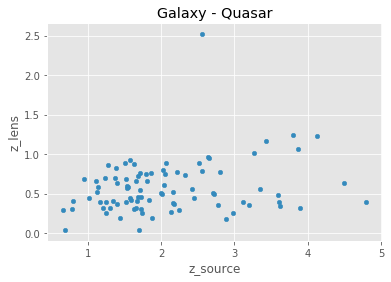

In [4]:
gqso_df = pd.read_csv('gal-qso.csv')
gqso_df.head()
gqso_df.plot(kind='scatter', x='z_source', y='z_lens', title='Galaxy - Quasar')

In [5]:
min(lens_df['z_lens_err']), max(lens_df['z_lens_err'])

(1e-05, 3.0)

In [6]:
min(lens_df['z_source_err']), max(lens_df['z_source_err'])

(8e-05, 0.57)

## CASTLeS

In [7]:
castles_df = pd.read_csv('castles_rafael.csv')
castles_df

,RA,RA_error,DEC,DEC_error,Object,tag,redshift
0,-0.795,0.003,-0.156,0.003,B0712,Lente,0.410
1,-0.747,0.003,-0.292,0.006,B0712,Lente,0.410
2,0.013,0.004,-0.804,0.003,B0712,Lente,0.410
3,0.391,0.006,0.307,0.003,B0712,Lente,0.410
4,0.000,0.000,0.000,0.000,B0712,Lente,1.340
5,-0.092,0.004,-0.145,0.005,B0712,Lente,0.410
6,0.000,0.000,0.000,0.000,B1030,Lente,1.540
7,0.963,0.003,-1.308,0.003,B1030,Lente,0.600
8,0.878,0.003,-1.143,0.003,B1030,Lente,0.600
9,0.374,0.008,-1.283,0.005,B1030,Lente,0.600


In [8]:
grouped2 = castles_df.groupby(['Object', 'RA', 'DEC'])
grouped2

## Teoria

Raio de Einstein:  $\theta _{E} =  \sqrt{ \frac{4GM D_{LS}}{ c^{2} D_{L}  D_{S}  } }$

Os efeitos dependem do perfil de densidade da lente





#### Estrelas e planetas

Perfil: lente pontual de massa M

Sempre produz duas imagens de uma fonte, em posições:

$\theta _{1,2} = \frac{1}{2}  \big( \beta \pm  \sqrt{  \beta ^{2} + 4  \theta_{E} ^{2} }  \big)$ 



#### Clusters (halos de matéria escura) 

Perfil : NFW


Maioria possui 2 ou 4 imagens, mas algumas possuem mais

-> Parametros: massa total, redshift, parâmetro de concentração e overdensity

#### Galáxias

Perfil: Esfera isotérmica, hernquist (Baryonic), NFW (Dark matter)

Para um perfil fixo: 

Lente com densidade superficial > dC pode gerar múltiplas imagens

Aumentando dC -> Raio diminui, componente estelar mais dominante

Diminuindo dC -> Raio eumenta, componente matéria escura mais dominante






/home/vivianemm/.local/lib/python3.6/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


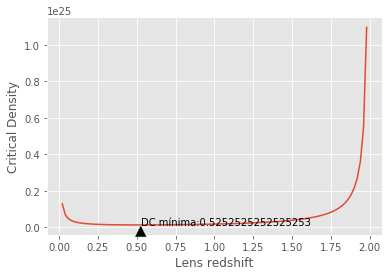

In [22]:
# cosmologia (modelo padrao, flat)
cosmo_obj = cosmo.FlatLambdaCDM(H0=70, Om0=0.3)


# Distancia de diametro angular (Universo plano)
def d_angular(z):
    da = cosmo_obj.angular_diameter_distance(z)
    return da

# distancia source - lens
def d_ls(zs, zl):
    ds = d_angular(zs)
    dl = d_angular(zl)
    return ds - (1+zl)/(1+zs)*dl

# Densidade critica
def critical_dens(zs, zl):
    ds = d_angular(zs)
    dl = d_angular(zl)
    dls = d_ls(zs, zl)
    c_dens = ((sp.c**2)/(4*sp.pi*sp.G)) * (ds/(dl*dls))
    return c_dens

f = plt.figure()
zl = np.linspace(0,2,100)
DC = critical_dens(2, zl)
plt.plot(zl, DC)

plt.ylabel('Critical Density')
plt.xlabel('Lens redshift')

xmin = zl[np.argmin(DC)]
ymin = DC.min()
plt.annotate('DC mínima:'+str(xmin), xy=(xmin, ymin.value), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.text(s='Menor Dc -> maior efeito de lente \n z_lens ~metade de z_source', x=0.5, y=4*10**27)

# xytext=(1.1, 2*10**27)
plt.show()

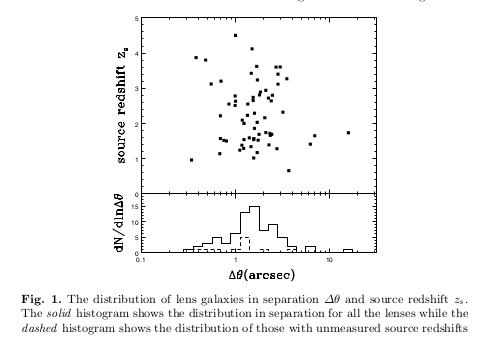

In [10]:
from IPython.display import display, Image
display(Image(filename='source_z.png'))
# GL: Strong, Weak and Micro

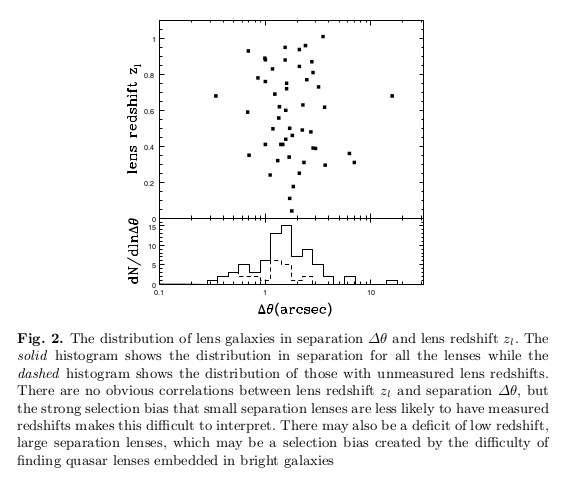

In [11]:
display(Image(filename='lens_z.png'))